<a id='top'></a>
## Diamonds

This is a regression model built to predict a diamond's price based on different characteristics of a diamond. 

It starts with simple linear regression model. The model will try to use a single indepdent variable (in this case the carat size) to predict a dependent variable (price of the diamond) as this seems to make sense, the larger the carat size the more expensive it should be. 

Using the data provided by Kaggle, the data is a single comma-seprated file (csv) with the following characteristics:

- A data frame with 53940 rows and 10 variables:
- price: price in US dollars (\$326--\$18,823)
- carat: weight of the diamond (0.2--5.01)
- cut: quality of the cut (Fair, Good, Very Good, Premium, Ideal)
- color: diamond colour, from J (worst) to D (best)
- clarity: a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
- x: length in mm (0--10.74)
- y: width in mm (0--58.9)
- z: depth in mm (0--31.8)
- depth: total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)
- table: width of top of diamond relative to widest point (43--95)

Further description and download link can be found in the [references](#references) section of this notebook




## Step 1 - Importing the libraries needed to process the data and the regression model

pandas - Python library used to process data. We will put the data into a pandas data frame for ease of use.
matplotlib - library used to generate a plot in Python. we will generate a scatter plot and the regression line using this library
Sklearn - this is the libary used for machine learning in Python. It is called scikitl-learn. It contains the functions and methods to:
- Split data to train and test
- Linear regression test
- Metrics to evaluate the model

In [1]:
# Step 1: Importing libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

## Step 2 - Importing the data and defining the columns. 
Referring to the documentation from Kaggle, and reviewing the csv file to find the format of the data is important
- The columns are defined 
- The variable Diamond is used to point to the data read into memory using pandas


In [2]:
# Step 2: Defining the columns of and reading the DataFrame 
#columns = ['carat',	'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x' ,'y', 'z']
Diamond = pd.read_csv('diamonds.csv')


## Step 3 - Exploring the data frame
Exploring the data frame created will ensure our data looks good, we can get some descriptions from the data by using the following methods


- .info() - prints information about the data such as 
    - number of columns
    - column labels
    - data types **
    - range index - how many rows of data
A good way to get some statistics on the data we are using
- .describe() - quick calculation of the data 
    - count - not empty values
    - mean - average
    - std - standard deviation
    - min - minimum value
    - 25% - 25% percentile
    - 50% - 50% percentile
    - 75% - 75% percential
    - max - maximum value

** As shown in the output of .info()  the data returned three types, int64, float64 and object. Since regression can only use numeric data, we should be aware cut, color, clarity cannot be used as it. More on this later in the notebook. 

In [3]:

print("Printing some information about the data using .info():\n")
Diamond.info()
print("\n The data description using .describe():")
Diamond.describe()


Printing some information about the data using .info():

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB

 The data description using .describe():


,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


A small snapshot of the data using the .head() method
- .head() - method in pandas used to return a few rows of the data. If a number is not specified, return the first 5 rows. We will use this again later for data comparision. Notice cut color and categoric features (non-numeric) 

In [4]:

print("Printing 5 rows of the data:")
Diamond.head()

Printing 5 rows of the data:


,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


We want to make sure this data is complete and does not have any missing values. Using the .isna() will show any missing values denoted as NaN  by Pandas

All zeros in the right column means there is data in each row for the column

In [5]:
#  Diamond['price'].value_counts()
Diamond.isna().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

Finding the cross correlation matrix. - Since we only want to do a simple regression test, we want to try the find the independant variable that is closest to the price of the diamond. By running the .corr() method , Pandas will show us how the relationship between the columns in the dataframe. The higher the number the closer the columns are related to each other. Only numeric values are shown in this matrix. We will look at the categorical (non-numeric) data later in part 2

In [6]:
# Finding the cross-correlation matrix - Looking for two correlated values. 
print(Diamond.corr(numeric_only = True))

            Unnamed: 0     carat     depth     table     price         x  \
Unnamed: 0    1.000000 -0.377983 -0.034800 -0.100830 -0.306873 -0.405440   
carat        -0.377983  1.000000  0.028224  0.181618  0.921591  0.975094   
depth        -0.034800  0.028224  1.000000 -0.295779 -0.010647 -0.025289   
table        -0.100830  0.181618 -0.295779  1.000000  0.127134  0.195344   
price        -0.306873  0.921591 -0.010647  0.127134  1.000000  0.884435   
x            -0.405440  0.975094 -0.025289  0.195344  0.884435  1.000000   
y            -0.395843  0.951722 -0.029341  0.183760  0.865421  0.974701   
z            -0.399208  0.953387  0.094924  0.150929  0.861249  0.970772   

                   y         z  
Unnamed: 0 -0.395843 -0.399208  
carat       0.951722  0.953387  
depth      -0.029341  0.094924  
table       0.183760  0.150929  
price       0.865421  0.861249  
x           0.974701  0.970772  
y           1.000000  0.952006  
z           0.952006  1.000000  


### The correlation matrix above shows that price is closely related to carat which indicates this may be a good relationship to use for our regresssion model

## Step 3 - Assigning the X and y 
We need the independent variable and dependent variables assigned. X is independent and y is dependent. we are going to use X to predict y
X = adding carat to the feature matrix
y = adding price as the target variable 

In [7]:
# Step 3: Assigning our feature matrix (X) and target varaible (y)
#Using the carat of the diamond to predict the price
X = Diamond[['carat']]
y = Diamond['price']

## Step 4 Dividing the data into two sets
we want to take our data and divide it into two sets, train and test. We will use our train set to train the model and use the test set afterwards. 70% of the data will be used to train the model with 30% used as the test data set.  Using a the random_state option sets a seed so that we can recreate the same test with same results. shuffle will shuffle the data before it splits so we get a good representation of the data without introducing a bias such as order of the data into our sets. train_test_split(0 is a function of scikit-learn

In [8]:

# Step 4: Dividing the dataset into test and train data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10, shuffle=True)

## Step 5 Training the Linear Regression Model
We train the model using the LinearRegression() function from scikit_learn. We are using the training set of data.

In [9]:
# Step 5: Selecting the linear regression method from the scikit-learn library
model = LinearRegression().fit(X_train, y_train)

## Step 6  Predicting the Diamond price

Using the .predict() from scikit-learn, we are predicting y based on the X Training set as well as y based on the X test set. This will allow us to calculate the performance of the model. 

In [10]:
# Step 6: Preciting the diamonds price from training and test data
y_prediction_train = model.predict(X_train)
y_prediction_test = model.predict(X_test)

## Step 7 Evaluating the performance of the model.
We predicted the diamond's price in step 6. We want to see how it performs. We are going to use the R2 score and the Mean Absolute Error (MAE) as indications of how well our model can predict the price of a diamond using only the carat size.

Interpreting the R2 score we can see how well our model fit the data. the percentage of the variance in the dependent variable that the independant variable explains. In other words how accurate to predict the price of the diamond using the carat size. The closer to 1 theoretically the better the model fit. 

MAE will show us how "off" our model is. Because the diamond prices can vary and are dependent on its characteristics, we considered using MAE because it is  less sensitve to outliers. The lower the MAE, the closer the predictions are to the actual values.

In [11]:
# Step 7:  Evaluation
# Evaluating the trained model on training data

print(f"The average carat size of diamonds in data {Diamond['carat'].mean()}")
print(f"The average price of diamonds in the data {Diamond['price'].mean()}")

print ("R2 score on train data= ",metrics.r2_score(y_train,y_prediction_train))
print ("R2 score on test data= ",metrics.r2_score(y_test,y_prediction_test))
print("MAE on train data= " , metrics.mean_absolute_error(y_train, y_prediction_train))
print("MAE on test data = " , metrics.mean_absolute_error(y_test, y_prediction_test))

The average carat size of diamonds in data 0.7979397478680014
The average price of diamonds in the data 3932.799721913237
R2 score on train data=  0.8489310901361602
R2 score on test data=  0.8501942187978508
MAE on train data=  1000.8159869452907
MAE on test data =  1020.8121240790447


## Step 8 Graphing the data and regression line
We will use matplotlib to produce a scatter plot of both sets of data and also plot the regeression line for both test and train data sets.  Reference lines for the average carat size (X) and price (y) were added as an observation point

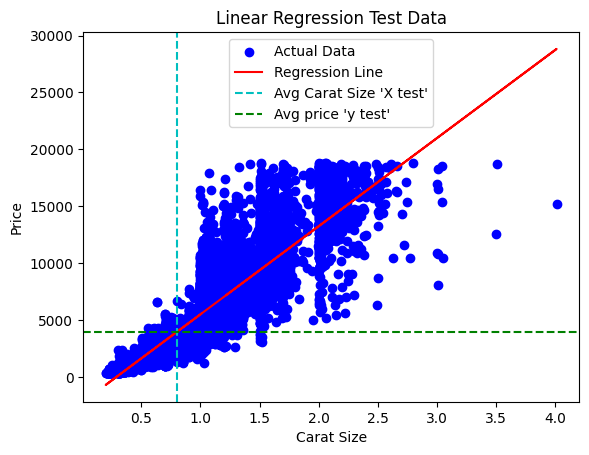

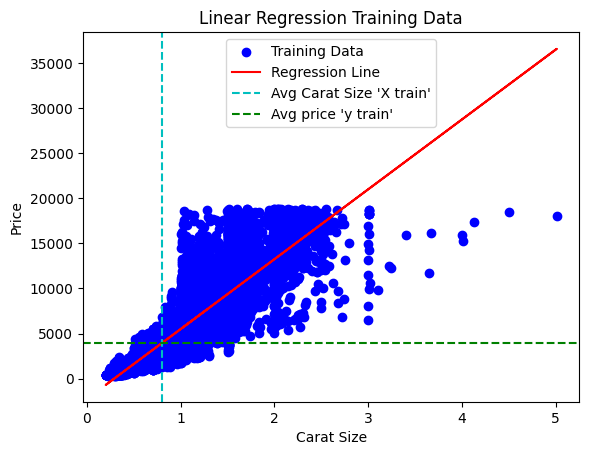

In [12]:
plt.scatter(X_test, y_test, color='b', label='Actual Data')
plt.plot(X_test, y_prediction_test, color='r', label='Regression Line')
plt.axvline(x=np.nanmean(X_test),color='c',linestyle='--', label ='Avg Carat Size \'X test\'')
plt.axhline(y=np.nanmean(y_test),color='g',linestyle='--', label ='Avg price \'y test\'')
plt.xlabel('Carat Size')
plt.ylabel('Price')
plt.legend()
plt.title('Linear Regression Test Data')
plt.show()

plt.scatter(X_train, y_train, color='b', label='Training Data')
plt.plot(X_train, y_prediction_train, color='r', label='Regression Line')
plt.axvline(x=np.nanmean(X_train),color='c',linestyle='--', label ='Avg Carat Size \'X train\'')
plt.axhline(y=np.nanmean(y_train),color='g',linestyle='--', label ='Avg price \'y train\'')
plt.xlabel('Carat Size')
plt.ylabel('Price')
plt.legend()
plt.title('Linear Regression Training Data')
plt.show()

For and easy reference, we created a dataframe using the actual values of price and carat size from the data and the predicted value from the regression model. This is an easy way to visually examine the accuracy of the model. As mentioned in step 3, we will use .head() to print out the first 25 rows of the data. Alternatively, we can use .iloc[] in pandas to select a range of rows to print out. The code box below has commented instruction to use .iloc[]

In [13]:

#put the data into a dataframe to compare actual and predicted values, print 25 rows
#comparison_df = pd.DataFrame({"Actual":y_test, "Predicted":y_prediction_test}) 

comparison_df = pd.DataFrame({"Carat": X_test['carat'], "Actual y":y_test, "Predicted y ":y_prediction_test}) 
comparison_df.head(25)

# comment out the line above and uncomment the line below to print different sections of the dataframe. Adjust the range for the section of data to print. 
#print (comparison_df.iloc[25:50])

,Carat,Actual y,Predicted y
8018,1.01,4330,5576.310732
1583,0.70,3008,3173.897620
9138,1.13,4537,6506.277098
2787,0.76,3257,3638.880803
52429,0.70,2513,3173.897620
47228,0.55,1840,2011.439663
13271,1.00,5484,5498.813535
43309,0.51,1402,1701.450874
5518,1.00,3850,5498.813535
47595,0.53,1877,1856.445269


# Results 
Our results above indicates a fairly decent accurate model based soley on the carat size to predict the price. 
We can look at a graph above and also a sampling of what the data looks like.  The R2 score indicates this would be a fairly accurate model. The MAE indicated our model is off about ~1000 average.   The intersection of the mean of X and mean of y directly on the regression line also indicates a fairly accurate mode since the intersection point represents the value of y when X is at its average. However, there are some variances in accuracy. We can see some predicted values are within twenty dollars on some diamonds and off by thousands on others.   We will try to perform a multiple regression below to see if the model is more accurate when including other features.  We will look at the R2 and MAE as an indication to see if our model is more accurate when using a larger feature matrix.

## Multiple Regression
Since our model above had some larger variances in the results, can we get the model to be more accurate? One way we can try to do this is to include more features in the data and see if these additional features affect the accuracy of the model.  We will use a multiple regression for this. 
To keep the dataframes separate, we will import the data into a different dataframe called M_diamond.  We will also have to prepare the data to include the categorical features cut, color , clarity as these seem important when deciding the price of a diamond.

In [14]:
# Step 2: reading the DataFrame and printing a few lines data fraome. 

M_diamond = pd.read_csv('diamonds.csv')
M_diamond.head()


,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


### The column 'Unnamed: 0' isn't necessary as it seems like it is just a row indicator. The dataframe will also have a column to indicated the rows, so we will drop this column from the dataframe as we do not want to use it.

In [15]:
# drop the Unnamed: 0 column
M_diamond.drop('Unnamed: 0', axis=1,inplace=True)

## Data Preparation

This time we need to prepare the data by converting the categorical features into numerical values. In order to do this, we will essentially take the unique answers from each of the columns (color and clarity) and create additional columns in the dataframes with the unique answers. After the columns are created, for each diamond,  we will populate the appropriate cell with a 1 to indicate which of the characteristics the diamond has.

For example, take the color of a diamond. Each diamond is graded against a scale which contains seven colors (E,I,J,H,F,G,D).  We wiill expand the dataframe to include one column for each of the color grades. if I diamond is graded an 'E' in color, the dataframe will contain a '1' in the new 'E' column and '0' for the other columns (I,J,H,F,G,D). This ensures we have accounted for the color with a numberic value. We will apply the same concept for clarity by expanding the dataframe with an additional eight columns (one for each clarity grade).

Since the cut rating of a diamond is ordinal (hierarchal scale) we will convert this column to a numerical scale from 0 - 4 as follows:

- Fair = 0
- Good - 1
- Very Good = 2
- Premium = 3
- Ideal = 4


In [16]:
# looking to identify the columns which contain categorical features. 
M_diamond.select_dtypes('object').columns

Index(['cut', 'color', 'clarity'], dtype='object')

In the code box below, we are iterating through the data frame columns which contain objects as datatypes
the for loop controls the iteration for each column. The if statement will print the column name and the unique values in the column if the column's datatype is 'object'

This will give us the unique names we need to add the columns for color and clarity. It also shows the unique values for the rating scale for cut.

In [17]:
for col in M_diamond:
    if M_diamond[col].dtypes=='object':
        print(f'{col} : {M_diamond[col].unique()}')

cut : ['Ideal' 'Premium' 'Good' 'Very Good' 'Fair']
color : ['E' 'I' 'J' 'H' 'F' 'G' 'D']
clarity : ['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF']


The code box below is using  one-hot encoding to convert each of the unique values we identified above to boolean datatype. This technique involves using a new dataframe called dummies below and  using the 'get_dummies' function from Pandas.  As noted above, we will peform this for the 'color' and 'clarity' columns.

The concept of Multicollinearity can occur when using the one-hot encoding. This means that two or more of the new independent variables we are creating have a high correlation with one another in the model which makes it difficult to identify the effect of each variable's effect on the dependent variable. They are simply too closely related. when using dummy variables the dummy variable trap can occur in which one dummy variable can be predicted from the others. We will drop one of the dummy variables. the 'drop_first = True' option below will drop the first level of variable. Comparre the output of 'dummies.dtypes' below to the unique object values from above. One unique value was dropped from 'cut' and one from 'clarity'

In [18]:
dummies = pd.get_dummies(M_diamond[['color','clarity']],drop_first=True)
dummies.dtypes, print(f"A few lines of the new dataframe \n {dummies.head()}")

A few lines of the new dataframe 
    color_E  color_F  color_G  color_H  color_I  color_J  clarity_IF  \
0     True    False    False    False    False    False       False   
1     True    False    False    False    False    False       False   
2     True    False    False    False    False    False       False   
3    False    False    False    False     True    False       False   
4    False    False    False    False    False     True       False   

   clarity_SI1  clarity_SI2  clarity_VS1  clarity_VS2  clarity_VVS1  \
0        False         True        False        False         False   
1         True        False        False        False         False   
2        False        False         True        False         False   
3        False        False        False         True         False   
4        False         True        False        False         False   

   clarity_VVS2  
0         False  
1         False  
2         False  
3         False  
4         False  


(color_E         bool
 color_F         bool
 color_G         bool
 color_H         bool
 color_I         bool
 color_J         bool
 clarity_IF      bool
 clarity_SI1     bool
 clarity_SI2     bool
 clarity_VS1     bool
 clarity_VS2     bool
 clarity_VVS1    bool
 clarity_VVS2    bool
 dtype: object,
 None)

From the header output above, we can see the results of the 'get_dummies' function created the new boolean columns, but the values are not numeric. The values in the columns are set the "True" if the diamond in the row is rated a particular color or clarity rating and 'False' for the remaining respective columns. The next codebox uses the .replace() method to replace 'True' with a '1' and 'False' with a '0' and set the type as integer. This is the final step for color and clarity columns. observe the output from the box below. All of the values are now '1' or '0'

In [19]:
for col in dummies:
    dummies[col] = dummies[col].replace({'True':1,'False':0}).astype(int)
    
dummies

,color_E,color_F,color_G,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,1,0,0,0,0,0,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0,0,0,0,0,0,0,1,0,0,0,0,0
53936,0,0,0,0,0,0,0,1,0,0,0,0,0
53937,0,0,0,0,0,0,0,1,0,0,0,0,0
53938,0,0,0,1,0,0,0,0,1,0,0,0,0


Now that the dummies dataframe is complete for color and clarity, we will now concatenate the dummies df with our M_diamond dataframe. Also drop the categorical 'color' and 'clarity' columns

In [20]:
# Concat the two dataframes together as noted in above Markdown box. 
M_diamond = pd.concat([M_diamond,dummies],axis=1)
M_diamond.drop(['color','clarity'],axis=1,inplace=True)
M_diamond

,carat,cut,depth,table,price,x,y,z,color_E,color_F,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,Ideal,61.5,55.0,326,3.95,3.98,2.43,1,0,...,0,0,0,0,0,1,0,0,0,0
1,0.21,Premium,59.8,61.0,326,3.89,3.84,2.31,1,0,...,0,0,0,0,1,0,0,0,0,0
2,0.23,Good,56.9,65.0,327,4.05,4.07,2.31,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,Premium,62.4,58.0,334,4.20,4.23,2.63,0,0,...,0,1,0,0,0,0,0,1,0,0
4,0.31,Good,63.3,58.0,335,4.34,4.35,2.75,0,0,...,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,60.8,57.0,2757,5.75,5.76,3.50,0,0,...,0,0,0,0,1,0,0,0,0,0
53936,0.72,Good,63.1,55.0,2757,5.69,5.75,3.61,0,0,...,0,0,0,0,1,0,0,0,0,0
53937,0.70,Very Good,62.8,60.0,2757,5.66,5.68,3.56,0,0,...,0,0,0,0,1,0,0,0,0,0
53938,0.86,Premium,61.0,58.0,2757,6.15,6.12,3.74,0,0,...,1,0,0,0,0,1,0,0,0,0


The final column to fix is to replace the cut column with a numeric scale. 
We first look at the unique values in the dataframe

In [21]:
M_diamond.cut.unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

Next we use .replace() again to replace the values as follows:
- Fair = 0
- Good - 1
- Very Good = 2
- Premium = 3
- Ideal = 4

We print the info for the dataframe to confirm all columns are now numeric

In [22]:
# replace the values in cut with numeric scale and disply the data type for each column
M_diamond['cut'] = M_diamond['cut'].replace({'Fair':0,'Good':1,'Very Good':2,'Premium':3,'Ideal':4})
M_diamond.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   carat         53940 non-null  float64
 1   cut           53940 non-null  int64  
 2   depth         53940 non-null  float64
 3   table         53940 non-null  float64
 4   price         53940 non-null  int64  
 5   x             53940 non-null  float64
 6   y             53940 non-null  float64
 7   z             53940 non-null  float64
 8   color_E       53940 non-null  int32  
 9   color_F       53940 non-null  int32  
 10  color_G       53940 non-null  int32  
 11  color_H       53940 non-null  int32  
 12  color_I       53940 non-null  int32  
 13  color_J       53940 non-null  int32  
 14  clarity_IF    53940 non-null  int32  
 15  clarity_SI1   53940 non-null  int32  
 16  clarity_SI2   53940 non-null  int32  
 17  clarity_VS1   53940 non-null  int32  
 18  clarity_VS2   53940 non-nu

In [23]:
# Finding the cross-correlation matrix - Looking for additional  correlated values. 
print(M_diamond.corr(numeric_only = True))

                 carat       cut     depth     table     price         x  \
carat         1.000000 -0.134967  0.028224  0.181618  0.921591  0.975094   
cut          -0.134967  1.000000 -0.218055 -0.433405 -0.053491 -0.125565   
depth         0.028224 -0.218055  1.000000 -0.295779 -0.010647 -0.025289   
table         0.181618 -0.433405 -0.295779  1.000000  0.127134  0.195344   
price         0.921591 -0.053491 -0.010647  0.127134  1.000000  0.884435   
x             0.975094 -0.125565 -0.025289  0.195344  0.884435  1.000000   
y             0.951722 -0.121462 -0.029341  0.183760  0.865421  0.974701   
z             0.953387 -0.149323  0.094924  0.150929  0.861249  0.970772   
color_E      -0.139215 -0.004110 -0.028713  0.007172 -0.101089 -0.134213   
color_F      -0.060052 -0.007697 -0.017741 -0.004906 -0.024161 -0.048021   
color_G      -0.029038  0.040155  0.002768 -0.038815  0.008556 -0.024593   
color_H       0.102465 -0.010380  0.026037  0.011574  0.059223  0.095896   
color_I     

## Step 3 - Assigning the X and y 
We need the independent variable and dependent variables reassigned. X is independent and y is dependent. we are going to use X to predict y
X = drop the price column and use all of the remaining columns. This increases the feature matrix from the previous simple regression. 
y = adding price as the target variable 

In [24]:
# Step 3: Seperating the data into features and labels

X = M_diamond.drop('price',axis=1) # Independent variable
y = M_diamond['price'] # dependent variable
X.head()

,carat,cut,depth,table,x,y,z,color_E,color_F,color_G,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,4,61.5,55.0,3.95,3.98,2.43,1,0,0,0,0,0,0,0,1,0,0,0,0
1,0.21,3,59.8,61.0,3.89,3.84,2.31,1,0,0,0,0,0,0,1,0,0,0,0,0
2,0.23,1,56.9,65.0,4.05,4.07,2.31,1,0,0,0,0,0,0,0,0,1,0,0,0
3,0.29,3,62.4,58.0,4.20,4.23,2.63,0,0,0,0,1,0,0,0,0,0,1,0,0
4,0.31,1,63.3,58.0,4.34,4.35,2.75,0,0,0,0,0,1,0,0,1,0,0,0,0


## Step 4 Dividing the data into two sets
we want to take our data and divide it into two sets, train and test. We will use our train set to train the model and use the test set afterwards. 70% of the data will be used to train the model with 30% used as the test data set.  Using a the random_state option sets a seed so that we can recreate the same test with same results. shuffle will shuffle the data before it splits so we get a good representation of the data without introducing a bias such as order of the data into our sets. train_test_split(0 is a function of scikit-learn

In [25]:

# Step 4: Dividing the dataset into test and train data
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.3, random_state=10, shuffle=True)
X_train2.head()



,carat,cut,depth,table,x,y,z,color_E,color_F,color_G,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
23590,1.02,4,62.6,57.0,6.47,6.41,4.03,1,0,0,0,0,0,1,0,0,0,0,0,0
20122,1.23,4,61.3,57.0,6.92,6.87,4.23,0,0,0,1,0,0,1,0,0,0,0,0,0
41416,0.53,4,62.4,59.0,5.18,5.21,3.24,0,0,0,1,0,0,0,1,0,0,0,0,0
19392,1.50,2,62.9,56.0,7.24,7.33,4.58,0,0,0,1,0,0,0,1,0,0,0,0,0
48949,0.70,4,61.6,57.0,5.73,5.69,3.52,0,0,0,0,0,1,0,0,1,0,0,0,0


## Step 5 Training the Linear Regression Model
We train the model using the LinearRegression() function from scikit_learn. We are using the training set of data 

In [26]:
# Step 5: Selecting the linear regression method from the scikit-learn library
model = LinearRegression().fit(X_train2, y_train2)



## Step 6 Predictions and Performance Evaluation
This time we combined the prediction of the price using the data and we calculate the MAE and R2 values to evaluate the performnance.  The comparision data frame is also created to allow for an easy comparision with the results from the simple regression above

In [27]:
# Step 6: Validation
# Evaluating the trained model on training data
# MAE is relative depending on the scale of the data. The data scale for X ,y is two digits, so 
#The best possible score is 1 which is obtained when the predicted values are the same as the actual values.
print(f"The average carat size of diamonds in data {M_diamond['carat'].mean():.4f}")
print(f"The average price of diamonds in the data {M_diamond['price'].mean():.2f}")

# Generate the predictions
y_prediction_train2 = model.predict(X_train2)
y_prediction_test2 = model.predict(X_test2)

# Evaluating the trained model on both data sets
print("MAE on multiple regression train data= " , metrics.mean_absolute_error(y_train2, y_prediction_train2))
print("MAE on multiple regression test data = " , metrics.mean_absolute_error(y_test2, y_prediction_test2))
print ("R2 score on muliptle regression train data= ",metrics.r2_score(y_train2,y_prediction_train2))
print ("R2 score on muliptle regression test data= ",metrics.r2_score(y_test2,y_prediction_test2))


#put the data into a dataframe to compare actual and predicted values, print 25 rows
comparison_df2 = pd.DataFrame({"Carat":X_test2["carat"],"Actual":y_test2, "Predicted":y_prediction_test2})
comparison_df2.head(25)



#print(y_prediction_train)
#print(y_prediction_test)
#print(X_train)

The average carat size of diamonds in data 0.7979
The average price of diamonds in the data 3932.80
MAE on multiple regression train data=  738.6234898372023
MAE on multiple regression test data =  747.441139599684
R2 score on muliptle regression train data=  0.9187568109210584
R2 score on muliptle regression test data=  0.9201771267897128


,Carat,Actual,Predicted
8018,1.01,4330,5721.220648
1583,0.70,3008,4053.625034
9138,1.13,4537,4996.048053
2787,0.76,3257,4201.629989
52429,0.70,2513,3097.519558
47228,0.55,1840,2071.305166
13271,1.00,5484,5653.234245
43309,0.51,1402,1891.005493
5518,1.00,3850,3523.952951
47595,0.53,1877,2494.410460


# Final Results
Looking at the results from the code box below, one can see the R2 scores were closer to 1 when multiple columns were used in the linear regression model. In addition, the MAE lowered which indicates our model had less variance when using the multiple linear regression model.

Two bar charts were created using matplotlib. The values and labels were put into two separate lists. Titles were added and the bar chart was plotted for each value


The R2 simple linear regression on training data : 0.8489
The R2 multiple regression on training data : 0.9188


The R2 simple linear regression on test data : 0.8502
The R2 multiple linear regression on test data : 0.9202


The MAE simple linear regression on training data : 1000.816
The MAE multiple linear regression on training data : 738.6235


The MAE multiple linear regression on training data : 747.4411
The MAE simple linear regression on test data : 1020.8121


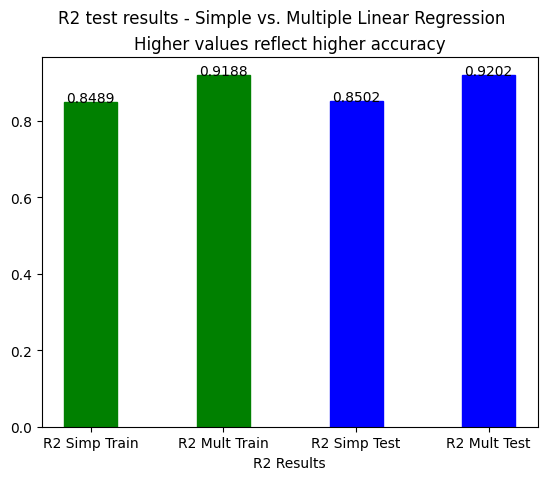

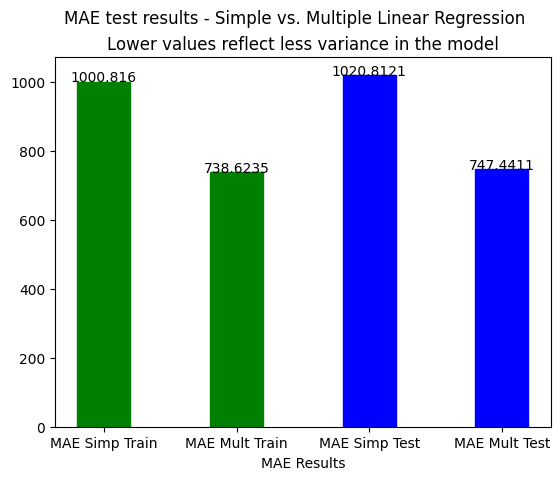

In [28]:
# R2 Score and MAE using metrics from scikit-learn - round to 4 decimal places.
r2SimpleTrain = round(metrics.r2_score(y_train,y_prediction_train),4)
r2SimpleTest = round(metrics.r2_score(y_test,y_prediction_test),4)
r2MultiTrain =round(metrics.r2_score(y_train2,y_prediction_train2),4)
r2MultiTest = round(metrics.r2_score(y_test2,y_prediction_test2),4)

maeSimpleTrain = round(metrics.mean_absolute_error(y_train, y_prediction_train),4)
maeSimpleTest = round(metrics.mean_absolute_error(y_test, y_prediction_test),4)
maeMultiTrain = round(metrics.mean_absolute_error(y_train2, y_prediction_train2),4)
maeMultiTest = round(metrics.mean_absolute_error(y_test2, y_prediction_test2),4)

#Print the scores out 
print (f"The R2 simple linear regression on training data : {r2SimpleTrain}")
print (f"The R2 multiple regression on training data : {r2MultiTrain}")
print('\n')
print (f"The R2 simple linear regression on test data : {r2SimpleTest}")
print (f"The R2 multiple linear regression on test data : {r2MultiTest}")
print('\n')
print (f"The MAE simple linear regression on training data : {maeSimpleTrain}")
print (f"The MAE multiple linear regression on training data : {maeMultiTrain}")
print('\n')
print (f"The MAE multiple linear regression on training data : {maeMultiTest}")
print (f"The MAE simple linear regression on test data : {maeSimpleTest}")

## Create two bar graphs to compare R2 and MAE scores from simple to multi linear regression
# Put all values and labels into lists
r2Values=[r2SimpleTrain, r2MultiTrain, r2SimpleTest, r2MultiTest]
r2ValueLabels = ['R2 Simp Train','R2 Mult Train',  'R2 Simp Test','R2 Mult Test']
maeLabels=['MAE Simp Train', 'MAE Mult Train', 'MAE Simp Test','MAE Mult Test']
maeValues =[maeSimpleTrain, maeMultiTrain, maeSimpleTest, maeMultiTest]


# Create the first bar chart for R2
bars = plt.bar(r2ValueLabels, r2Values, width=0.4)
bars[0].set_color('green')
bars[1].set_color('green')
bars[2].set_color('blue')
bars[3].set_color('blue')
# Loop to put the centered data values on top of the bars
for i in range(len(r2ValueLabels)):
    plt.text(i,r2Values[i],r2Values[i], ha='center')
#Titles and labels for chart    
plt.suptitle('R2 test results - Simple vs. Multiple Linear Regression')
plt.title("Higher values reflect higher accuracy")
plt.xlabel('R2 Results')
plt.show()

# Create the second chart for MAE
bars = plt.bar(maeLabels, maeValues, width=0.4)
bars[0].set_color('green')
bars[1].set_color('green')
bars[2].set_color('blue')
bars[3].set_color('blue')
# Loop to put the centered data values on top of the bars
for i in range(len(maeLabels)):
    plt.text(i,maeValues[i],maeValues[i], ha='center')
#Titles and labels for chart
plt.suptitle('MAE test results - Simple vs. Multiple Linear Regression')
plt.title("Lower values reflect less variance in the model")
plt.xlabel('MAE Results')
plt.show() 

<a id='references'></a>
### References and sources
Data Source :   
https://www.kaggle.com/datasets/swatikhedekar/price-prediction-of-diamond/data

Basic Regression test sample:   
https://www.educative.io/blog/machine-learning-regression-models-with-python

Code to prepare categorical data:   
https://www.kaggle.com/code/amirulabdlatib/diamond-price-prediction 

Matplotlib plotting:   
https://www.geeksforgeeks.org/bar-plot-in-matplotlib/   
https://statisticsbyjim.com/regression/interpret-r-squared-regression/   
https://www.geeksforgeeks.org/plot-a-horizontal-line-in-matplotlib/   
https://bobbyhadz.com/blog/matplotlib-add-average-line-to-plot#:~:text=Use%20the%20pyplot.,data%20coordinates%20as%20a%20parameter   
https://www.geeksforgeeks.org/adding-value-labels-on-a-matplotlib-bar-chart/


R2 :   
https://statisticsbyjim.com/regression/interpret-r-squared-regression/

Multicollinearity:   
https://www.analyticsvidhya.com/blog/2020/03/what-is-multicollinearity/


Go back to [Top](#top)
